# Data discovery and cleaning and feature engineering

In [230]:
import pandas as pd

pd.set_option("display.max_columns", 10)
pd.set_option("display.max_rows", 50)
pd.set_option("plotting.backend", "plotly")

## Data discovery

In [231]:
file_path = "./../input/olist_"
file_end = "_dataset.csv"
customers = pd.read_csv("{0}customers{1}".format(file_path, file_end))
geolocation = pd.read_csv("{0}geolocation{1}".format(file_path, file_end))
order_items = pd.read_csv(
    "{0}order_items{1}".format(file_path, file_end), parse_dates=["shipping_limit_date"]
)
order_payments = pd.read_csv("{0}order_payments{1}".format(file_path, file_end))
order_reviews = pd.read_csv(
    "{0}order_reviews{1}".format(file_path, file_end),
    parse_dates=[
        "review_creation_date",
        "review_answer_timestamp",
    ],
)
orders = pd.read_csv(
    "{0}orders{1}".format(file_path, file_end),
    parse_dates=[
        "order_purchase_timestamp",
        "order_approved_at",
        "order_delivered_carrier_date",
        "order_delivered_customer_date",
        "order_estimated_delivery_date",
    ],
)
products = pd.read_csv("{0}products{1}".format(file_path, file_end))
sellers = pd.read_csv("{0}sellers{1}".format(file_path, file_end))

product_category_name_translation = pd.read_csv(
    "./../input/product_category_name_translation.csv".format(file_path)
)

In [232]:
print(
    "There are {0} unique customers.".format(len(customers.customer_unique_id.unique()))
)
print(customers.info())

customers

There are 96096 unique customers.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  
0                         14409                 franca             SP  
1                          9790  sao bernardo do campo             SP  
2                          1151              sao paulo             SP  
3                          8775        mogi das cruzes             SP  
4                         13056               campinas             SP  
...                         ...                    ...            ...  
99436                      3937              sao paulo             SP  
99437                      6764        taboao da serra             SP  
99438                     60115              fortaleza             CE  
99439                     92120                 canoas             RS  
99440                      6703                  cotia             SP  

[99441 rows x 5 columns]

In [233]:
print(geolocation.info())
geolocation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None


geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                               1037       -23.545621       -46.639292   
1                               1046       -23.546081       -46.644820   
2                               1046       -23.546129       -46.642951   
3                               1041       -23.544392       -46.639499   
4                               1035       -23.541578       -46.641607   
...                              ...              ...              ...   
1000158                        99950       -28.068639       -52.010705   
1000159                        99900       -27.877125       -52.224882   
1000160                        99950       -28.071855       -52.014716   
1000161                        99980       -28.388932       -51.846871   
1000162                        99950       -28.070104       -52.018658   

        geolocation_city geolocation_state  
0              sao paulo                SP  
1              sao paulo                SP  
2              sao paulo                SP  
3              sao paulo                SP  
4              sao paulo                SP  
...                  ...               ...  
1000158         tapejara                RS  
1000159   getulio vargas                RS  
1000160         tapejara                RS  
1000161  david canabarro                RS  
1000162         tapejara                RS  

[1000163 rows x 5 columns]

In [234]:
print(order_items.info())
order_items

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
None


order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

       shipping_limit_date   price  freight_value  
0      2017-09-19 09:45:35   58.90          13.29  
1      2017-05-03 11:05:13  239.90          19.93  
2      2018-01-18 14:48:30  199.00          17.87  
3      2018-08-15 10:10:18   12.99          12.79  
4      2017-02-13 13:57:51  199.90          18.14  
...                    ...     ...            ...  
112645 2018-05-02 04:11:01  299.99          43.41  
112646 2018-07-20 04:31:48  350.00          36.53  
112647 2017-10-30 17:14:25   99.90          16.95  
112648 2017-08-21 00:04:32   55.99           8.72  
112649 2018-06-12 17:10:13   43.00          12.79  

[112650 rows x 7 columns]

In [235]:
print(order_payments.info())
order_payments

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None


order_id  payment_sequential payment_type  \
0       b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1       a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2       25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3       ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4       42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
...                                  ...                 ...          ...   
103881  0406037ad97740d563a178ecc7a2075c                   1       boleto   
103882  7b905861d7c825891d6347454ea7863f                   1  credit_card   
103883  32609bbb3dd69b3c066a6860554a77bf                   1  credit_card   
103884  b8b61059626efa996a60be9bb9320e10                   1  credit_card   
103885  28bbae6599b09d39ca406b747b6632b1                   1       boleto   

        payment_installments  payment_value  
0                          8          99.33  
1                          1          24.39  
2                          1          65.71  
3                          8         107.78  
4                          2         128.45  
...                      ...            ...  
103881                     1         363.31  
103882                     2          96.80  
103883                     1          47.77  
103884                     5         369.54  
103885                     1         191.58  

[103886 rows x 5 columns]

In [236]:
print(order_reviews.info())
order_reviews

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB
None


review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4                  NaN   
1                 5                  NaN   
2                 5                  NaN   
3                 5                  NaN   
4                 5                  NaN   
...             ...                  ...   
99219             5                  NaN   
99220             5                  NaN   
99221             5                  NaN   
99222             4                  NaN   
99223             1                  NaN   

                                  review_comment_message review_creation_date  \
0                                                    NaN           2018-01-18   
1                                                    NaN           2018-03-10   
2                                                    NaN           2018-02-17   
3                  Recebi bem antes do prazo estipulado.           2017-04-21   
4      Parabéns lojas lannister adorei comprar pela I...           2018-03-01   
...                                                  ...                  ...   
99219                                                NaN           2018-07-07   
99220                                                NaN           2017-12-09   
99221  Excelente mochila, entrega super rápida. Super...           2018-03-22   
99222                                                NaN           2018-07-01   
99223  meu produto chegou e ja tenho que devolver, po...           2017-07-03   

      review_answer_timestamp  
0         2018-01-18 21:46:59  
1         2018-03-11 03:05:13  
2         2018-02-18 14:36:24  
3         2017-04-21 22:02:06  
4         2018-03-02 10:26:53  
...                       ...  
99219     2018-07-14 17:18:30  
99220     2017-12-11 20:06:42  
99221     2018-03-23 09:10:43  
99222     2018-07-02 12:59:13  
99223     2017-07-03 21:01:49  

[99224 rows x 7 columns]

In [237]:
print(orders.info())
orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
None


order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp   order_approved_at  \
0        delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   
...            ...                      ...                 ...   
99436    delivered      2017-03-09 09:54:05 2017-03-09 09:54:05   
99437    delivered      2018-02-06 12:58:58 2018-02-06 13:10:37   
99438    delivered      2017-08-27 14:46:43 2017-08-27 15:04:16   
99439    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30 2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99436          2017-03-10 11:18:03           2017-03-17 15:08:01   
99437          2018-02-07 23:22:42           2018-02-28 17:37:56   
99438          2017-08-28 20:52:26           2017-09-21 11:24:17   
99439          2018-01-12 15:35:03           2018-01-25 23:32:54   
99440          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date  
0                        2017-10-18  
1                        2018-08-13  
2                        2018-09-04  
3                        2017-12-15  
4                        2018-02-26  
...                             ...  
99436                    2017-03-28  
99437                    2018-03-02  
99438                    2017-09-27  
99439                    2018-02-15  
99440                    2018-04-03  

[99441 rows x 8 columns]

In [238]:
print(products.info())
products

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None


product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0                     40.0                       287.0                 1.0   
1                     44.0                       276.0                 1.0   
2                     46.0                       250.0                 1.0   
3                     27.0                       261.0                 1.0   
4                     37.0                       402.0                 4.0   
...                    ...                         ...                 ...   
32946                 45.0                        67.0                 2.0   
32947                 41.0                       971.0                 1.0   
32948                 50.0                       799.0                 1.0   
32949                 60.0                       156.0                 2.0   
32950                 58.0                       309.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
0                 225.0               16.0               10.0   
1                1000.0               30.0               18.0   
2                 154.0               18.0                9.0   
3                 371.0               26.0                4.0   
4                 625.0               20.0               17.0   
...                 ...                ...                ...   
32946           12300.0               40.0               40.0   
32947            1700.0               16.0               19.0   
32948            1400.0               27.0                7.0   
32949             700.0               31.0               13.0   
32950            2083.0               12.0                2.0   

       product_width_cm  
0                  14.0  
1                  20.0  
2                  15.0  
3                  26.0  
4                  13.0  
...                 ...  
32946              40.0  
32947              16.0  
32948              27.0  
32949              20.0  
32950               7.0  

[32951 rows x 9 columns]

In [239]:
print(sellers.info())
sellers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None


seller_id  seller_zip_code_prefix  \
0     3442f8959a84dea7ee197c632cb2df15                   13023   
1     d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2     ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3     c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4     51a04a8a6bdcb23deccc82b0b80742cf                   12914   
...                                ...                     ...   
3090  98dddbc4601dd4443ca174359b237166                   87111   
3091  f8201cab383e484733266d1906e2fdfa                   88137   
3092  74871d19219c7d518d0090283e03c137                    4650   
3093  e603cf3fec55f8697c9059638d6c8eb5                   96080   
3094  9e25199f6ef7e7c347120ff175652c3b                   12051   

            seller_city seller_state  
0              campinas           SP  
1            mogi guacu           SP  
2        rio de janeiro           RJ  
3             sao paulo           SP  
4     braganca paulista           SP  
...                 ...          ...  
3090            sarandi           PR  
3091            palhoca           SC  
3092          sao paulo           SP  
3093            pelotas           RS  
3094            taubate           SP  

[3095 rows x 4 columns]

### Improving Data types

Some variables are wrongly interpreted by pandas, let's improve it.

* Zip Codes are string values ;
* All identifiers are strings (even if it's only built from numbers) ;
* Reduce size of variables (optimized types) ;

In [240]:
customers["customer_zip_code_prefix"] = customers["customer_zip_code_prefix"].astype(
    "object"
)
sellers["seller_zip_code_prefix"] = sellers["seller_zip_code_prefix"].astype("object")
geolocation["geolocation_zip_code_prefix"] = geolocation[
    "geolocation_zip_code_prefix"
].astype("object")

In [241]:
order_items["order_item_id"] = order_items["order_item_id"].astype("object")

In [242]:
# https://medium.com/bigdatarepublic/advanced-pandas-optimize-speed-and-memory-a654b53be6c2
from typing import List


def optimize_floats(df: pd.DataFrame) -> pd.DataFrame:
    """Optimize floats to the best data type

    Args:
        df (pd.DataFrame): A DataFrame

    Returns:
        pd.DataFrame: An optimized DataFrame
    """
    floats = df.select_dtypes(include=["float64"]).columns.tolist()
    df[floats] = df[floats].apply(pd.to_numeric, downcast="float")
    return df


def optimize_ints(df: pd.DataFrame) -> pd.DataFrame:
    """Optimize ints to the best data type

    Args:
        df (pd.DataFrame): A DataFrame

    Returns:
        pd.DataFrame: An optimized DataFrame
    """
    ints = df.select_dtypes(include=["int64"]).columns.tolist()
    df[ints] = df[ints].apply(pd.to_numeric, downcast="integer")
    return df


def optimize_objects(df: pd.DataFrame, datetime_features: List[str]) -> pd.DataFrame:
    """Optimize objects variables when it's possible

    Args:
        df (pd.DataFrame): A DataFrame
        datetime_features (List[str]): The list of datetime features

    Returns:
        pd.DataFrame: An optimized DataFrame
    """
    for col in df.select_dtypes(include=["object"]):
        if col not in datetime_features:
            if not (type(df[col][0]) == list):
                num_unique_values = len(df[col].unique())
                num_total_values = len(df[col])
                if float(num_unique_values) / num_total_values < 0.5:
                    df[col] = df[col].astype("category")
        else:
            df[col] = pd.to_datetime(df[col])
    return df


def optimize(df: pd.DataFrame, datetime_features: List[str] = []) -> pd.DataFrame:
    """Meta function to optimize all the DataFrames

    Args:
        df (pd.DataFrame): A DataFrame
        datetime_features (List[str], optional): The list of datetime features. Defaults to [].

    Returns:
        pd.DataFrame: [description]
    """
    return optimize_floats(optimize_ints(optimize_objects(df, datetime_features)))

In [243]:
customers = optimize(customers)
geolocation = optimize(geolocation)
order_items = optimize(order_items)
order_payments = optimize(order_payments)
order_reviews = optimize(order_reviews)
orders = optimize(orders)
products = optimize(products)
sellers = optimize(sellers)

In [244]:
print(customers.info())
print(geolocation.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   customer_id               99441 non-null  object  
 1   customer_unique_id        99441 non-null  object  
 2   customer_zip_code_prefix  99441 non-null  category
 3   customer_city             99441 non-null  category
 4   customer_state            99441 non-null  category
dtypes: category(3), object(2)
memory usage: 2.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   geolocation_zip_code_prefix  1000163 non-null  category
 1   geolocation_lat              1000163 non-null  float32 
 2   geolocation_lng              1000163 non-null  float32 
 3   geolocation_city    

In [245]:
print(order_items.info())
print(order_payments.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  category      
 2   product_id           112650 non-null  category      
 3   seller_id            112650 non-null  category      
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float32       
 6   freight_value        112650 non-null  float32       
dtypes: category(3), datetime64[ns](1), float32(2), object(1)
memory usage: 4.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   order_id              103886 non-null  object  
 1   payme

In [246]:
print(order_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int8          
 3   review_comment_title     11568 non-null  category      
 4   review_comment_message   40977 non-null  category      
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: category(2), datetime64[ns](2), int8(1), object(2)
memory usage: 5.1+ MB
None


In [247]:
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  category      
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](5), object(2)
memory usage: 5.4+ MB
None


In [248]:
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   product_id                  32951 non-null  object  
 1   product_category_name       32341 non-null  category
 2   product_name_lenght         32341 non-null  float32 
 3   product_description_lenght  32341 non-null  float32 
 4   product_photos_qty          32341 non-null  float32 
 5   product_weight_g            32949 non-null  float32 
 6   product_length_cm           32949 non-null  float32 
 7   product_height_cm           32949 non-null  float32 
 8   product_width_cm            32949 non-null  float32 
dtypes: category(1), float32(7), object(1)
memory usage: 1.2+ MB
None


In [249]:
print(sellers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   seller_id               3095 non-null   object  
 1   seller_zip_code_prefix  3095 non-null   object  
 2   seller_city             3095 non-null   category
 3   seller_state            3095 non-null   category
dtypes: category(2), object(2)
memory usage: 79.2+ KB
None


### Missing values

Some data frames contains null values :

* `order_reviews`
* `orders`
* `products`

Let's investigate a little bit !

#### Order reviews

In [250]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int8          
 3   review_comment_title     11568 non-null  category      
 4   review_comment_message   40977 non-null  category      
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: category(2), datetime64[ns](2), int8(1), object(2)
memory usage: 5.1+ MB


It look likes a complete entry is done every time a customer add a score to a product,
but they don't have to fill a title or a message.

Surprisingly, even when the customers fill a message they are not forced to fill a title.

We can complete these variables with empty value : this wont break anything neither change the statistics about title and message from a NLP point of view.

Also, these variables _shouldn't be categorical_...

In [251]:
order_reviews["review_comment_title"] = order_reviews["review_comment_title"].astype(
    "object"
)
order_reviews["review_comment_message"] = order_reviews[
    "review_comment_message"
].astype("object")

order_reviews.loc[
    order_reviews.review_comment_title.isna(), "review_comment_title"
] = ""
order_reviews.loc[
    order_reviews.review_comment_message.isna(), "review_comment_message"
] = ""

order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int8          
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int8(1), object(4)
memory usage: 4.6+ MB


#### Orders

In [252]:
print(orders.info())
orders.describe(datetime_is_numeric=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  category      
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](5), object(2)
memory usage: 5.4+ MB
None


order_purchase_timestamp              order_approved_at  \
count                          99441                          99281   
mean   2017-12-31 08:43:12.776581120  2017-12-31 18:35:24.098800128   
min              2016-09-04 21:15:19            2016-09-15 12:16:38   
25%              2017-09-12 14:46:19            2017-09-12 23:24:16   
50%              2018-01-18 23:04:36            2018-01-19 11:36:13   
75%              2018-05-04 15:42:16            2018-05-04 20:35:10   
max              2018-10-17 17:30:18            2018-09-03 17:40:06   

        order_delivered_carrier_date  order_delivered_customer_date  \
count                          97658                          96476   
mean   2018-01-04 21:49:48.138278656  2018-01-14 12:09:19.035542272   
min              2016-10-08 10:34:01            2016-10-11 13:46:32   
25%    2017-09-15 22:28:50.249999872  2017-09-25 22:07:22.249999872   
50%              2018-01-24 16:10:58     2018-02-02 19:28:10.500000   
75%              2018-05-08 13:37:45  2018-05-15 22:48:52.249999872   
max              2018-09-11 19:48:28            2018-10-17 13:22:46   

       order_estimated_delivery_date  
count                          99441  
mean   2018-01-24 03:08:37.730111232  
min              2016-09-30 00:00:00  
25%              2017-10-03 00:00:00  
50%              2018-02-15 00:00:00  
75%              2018-05-25 00:00:00  
max              2018-11-12 00:00:00

In [253]:
orders[["order_id", "order_status"]].groupby("order_status").count().sort_values(
    "order_id", ascending=False
).plot.bar()

We will keep only the delivered orders as there is no enough data for the others statuses.

Then we will keep only lines where all data are available

In [254]:
orders = orders[orders["order_status"] == "delivered"]
orders.drop(columns=["order_status"], inplace=True)
orders = orders.dropna()
print(orders.info())
orders.describe(datetime_is_numeric=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_purchase_timestamp       96455 non-null  datetime64[ns]
 3   order_approved_at              96455 non-null  datetime64[ns]
 4   order_delivered_carrier_date   96455 non-null  datetime64[ns]
 5   order_delivered_customer_date  96455 non-null  datetime64[ns]
 6   order_estimated_delivery_date  96455 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(2)
memory usage: 5.9+ MB
None


<ipython-input-254-6f0f347ef6f3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



order_purchase_timestamp              order_approved_at  \
count                          96455                          96455   
mean   2018-01-02 00:26:23.673806336  2018-01-02 10:43:03.401710592   
min              2016-09-15 12:16:38            2016-09-15 12:16:38   
25%       2017-09-14 09:39:02.500000            2017-09-14 14:42:23   
50%              2018-01-20 20:00:12            2018-01-22 13:49:24   
75%              2018-05-05 18:53:33     2018-05-06 10:52:57.500000   
max              2018-08-29 15:00:37            2018-08-29 15:10:26   

        order_delivered_carrier_date  order_delivered_customer_date  \
count                          96455                          96455   
mean   2018-01-05 05:53:41.200134656  2018-01-14 13:49:28.328526336   
min              2016-10-08 10:34:01            2016-10-11 13:46:32   
25%       2017-09-18 17:06:18.500000            2017-09-25 22:56:47   
50%              2018-01-24 16:28:58            2018-02-02 19:52:30   
75%              2018-05-08 14:34:30     2018-05-15 23:09:15.500000   
max              2018-09-11 19:48:28            2018-10-17 13:22:46   

       order_estimated_delivery_date  
count                          96455  
mean   2018-01-25 18:04:03.421284864  
min              2016-10-04 00:00:00  
25%              2017-10-05 00:00:00  
50%              2018-02-16 00:00:00  
75%              2018-05-28 00:00:00  
max              2018-10-25 00:00:00

We removed almost 3% of the total `orders` data.

#### Products

In [255]:
print(products.info())
products.describe(datetime_is_numeric=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   product_id                  32951 non-null  object  
 1   product_category_name       32341 non-null  category
 2   product_name_lenght         32341 non-null  float32 
 3   product_description_lenght  32341 non-null  float32 
 4   product_photos_qty          32341 non-null  float32 
 5   product_weight_g            32949 non-null  float32 
 6   product_length_cm           32949 non-null  float32 
 7   product_height_cm           32949 non-null  float32 
 8   product_width_cm            32949 non-null  float32 
dtypes: category(1), float32(7), object(1)
memory usage: 1.2+ MB
None


product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476948                  771.494629            2.188986   
std              10.245844                  635.115784            1.736839   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472900          30.815079          16.937662   
std         4282.056641          16.914257          13.638512   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1900.000000          38.000000          21.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  
count      32949.000000  
mean          23.196728  
std           12.079095  
min            6.000000  
25%           15.000000  
50%           20.000000  
75%           30.000000  
max          118.000000

In [256]:
undefined_category = "N/A"
products["product_category_name"].cat.add_categories([undefined_category], inplace=True)

products.loc[
    products["product_category_name"].isna(), "product_category_name"
] = undefined_category

<ipython-input-256-d5f6df8752f5>:2: FutureWarning:

The `inplace` parameter in pandas.Categorical.add_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.



In [257]:
products.loc[products.product_name_lenght.isna(), "product_name_lenght"] = 0
products.loc[
    products.product_description_lenght.isna(), "product_description_lenght"
] = 0
products.loc[products.product_photos_qty.isna(), "product_photos_qty"] = 0

In [258]:
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   product_id                  32951 non-null  object  
 1   product_category_name       32951 non-null  category
 2   product_name_lenght         32951 non-null  float32 
 3   product_description_lenght  32951 non-null  float32 
 4   product_photos_qty          32951 non-null  float32 
 5   product_weight_g            32949 non-null  float32 
 6   product_length_cm           32949 non-null  float32 
 7   product_height_cm           32949 non-null  float32 
 8   product_width_cm            32949 non-null  float32 
dtypes: category(1), float32(7), object(1)
memory usage: 1.2+ MB
None


In [259]:
# Only 2 values, let's use the mean of each product category : "bebes" and "N/A"
products[products.product_length_cm.isna()]

product_id product_category_name  \
8578   09ff539a621711667c43eba6a3bd8466                 bebes   
18851  5eb564652db742ff8f28759cd8d2652a                   N/A   

       product_name_lenght  product_description_lenght  product_photos_qty  \
8578                  60.0                       865.0                 3.0   
18851                  0.0                         0.0                 0.0   

       product_weight_g  product_length_cm  product_height_cm  \
8578                NaN                NaN                NaN   
18851               NaN                NaN                NaN   

       product_width_cm  
8578                NaN  
18851               NaN

In [260]:
baby_category = products[products.product_category_name == "bebes"][
    ["product_weight_g", "product_length_cm", "product_width_cm"]
].mean()
baby_category

product_id = "09ff539a621711667c43eba6a3bd8466"
products.loc[products.product_id == product_id, "product_weight_g"] = baby_category[
    "product_weight_g"
]
products.loc[products.product_id == product_id, "product_length_cm"] = baby_category[
    "product_length_cm"
]
products.loc[products.product_id == product_id, "product_width_cm"] = baby_category[
    "product_width_cm"
]

products[products.product_length_cm.isna()]

product_id product_category_name  \
18851  5eb564652db742ff8f28759cd8d2652a                   N/A   

       product_name_lenght  product_description_lenght  product_photos_qty  \
18851                  0.0                         0.0                 0.0   

       product_weight_g  product_length_cm  product_height_cm  \
18851               NaN                NaN                NaN   

       product_width_cm  
18851               NaN

In [261]:
na_category = products[products.product_category_name == "N/A"][
    ["product_weight_g", "product_length_cm", "product_width_cm"]
].mean()
na_category

product_id = "5eb564652db742ff8f28759cd8d2652a"
products.loc[products.product_id == product_id, "product_weight_g"] = na_category[
    "product_weight_g"
]
products.loc[products.product_id == product_id, "product_length_cm"] = na_category[
    "product_length_cm"
]
products.loc[products.product_id == product_id, "product_width_cm"] = na_category[
    "product_width_cm"
]

products[products.product_length_cm.isna()]

Empty DataFrame
Columns: [product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm]
Index: []

Ok, the dataset doesn't contains any null values anymore.

### Experiment 1 : RFM Clustering

When we want to do clustering on customer data, we can start with RFM :

* Recency : last date of order (or number of days since last order) ;
* Frequency : how many times the customer have ordered for a period of time ?
* Monetary : the amount spent by the customer ;

> We can calculate these behavioral features for each customer and try to do clustering using theses.

In [262]:
import numpy as np

# Add customerunique_id to orders
orders = orders.merge(
    customers[["customer_id", "customer_unique_id"]], on="customer_id", how="inner"
)

## Add total value of each order using order_items

orders_from_items = (
    order_items[["order_id", "price", "freight_value"]]
    .groupby("order_id")
    .sum()
    .reset_index()
)
orders_from_items["total_value"] = (
    orders_from_items["price"] + orders_from_items["freight_value"]
)

# https://github.com/pandas-dev/pandas/issues/35124
orders_from_items["total_value"] = orders_from_items["total_value"].astype(np.float64)
orders_from_items = orders_from_items.round(2)

orders_from_items = orders_from_items[["order_id", "total_value"]]

orders_from_items

orders = orders.merge(orders_from_items, on="order_id", how="inner")

orders

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
96450  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
96451  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
96452  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
96453  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
96454  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_purchase_timestamp   order_approved_at  \
0          2017-10-02 10:56:33 2017-10-02 11:07:15   
1          2018-07-24 20:41:37 2018-07-26 03:24:27   
2          2018-08-08 08:38:49 2018-08-08 08:55:23   
3          2017-11-18 19:28:06 2017-11-18 19:45:59   
4          2018-02-13 21:18:39 2018-02-13 22:20:29   
...                        ...                 ...   
96450      2017-03-09 09:54:05 2017-03-09 09:54:05   
96451      2018-02-06 12:58:58 2018-02-06 13:10:37   
96452      2017-08-27 14:46:43 2017-08-27 15:04:16   
96453      2018-01-08 21:28:27 2018-01-08 21:36:21   
96454      2018-03-08 20:57:30 2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
96450          2017-03-10 11:18:03           2017-03-17 15:08:01   
96451          2018-02-07 23:22:42           2018-02-28 17:37:56   
96452          2017-08-28 20:52:26           2017-09-21 11:24:17   
96453          2018-01-12 15:35:03           2018-01-25 23:32:54   
96454          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date                customer_unique_id  \
0                        2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                        2018-08-13  af07308b275d755c9edb36a90c618231   
2                        2018-09-04  3a653a41f6f9fc3d2a113cf8398680e8   
3                        2017-12-15  7c142cf63193a1473d2e66489a9ae977   
4                        2018-02-26  72632f0f9dd73dfee390c9b22eb56dd6   
...                             ...                               ...   
96450                    2017-03-28  6359f309b166b0196dbf7ad2ac62bb5a   
96451                    2018-03-02  da62f9e57a76d978d02ab5362c509660   
96452                    2017-09-27  737520a9aad80b3fbbdad19b66b37b30   
96453                    2018-02-15  5097a5312c8b157bb7be58ae360ef43c   
96454                    2018-04-03  60350aa974b26ff12caad89e55993bd6   

       total_value  
0            38.71  
1           141.46  
2           179.12  
3            72.20  
4            28.62  
...            ...  
96450        85.08  
96451       195.00  
96452       271.01  
96453       441.16  
96454        86.86  

[96455 rows x 9 columns]

We will consider the following :

* To define the **Recency**, "NOW" is the date of the last order ;
* The **Frequency** is based on the number of order per month since the first order ;
* The **Monetary** is the total spent by a customer ;

In [263]:
#
# Monetary
#

rfm = orders[
    ["customer_id", "order_purchase_timestamp", "customer_unique_id", "total_value"]
].copy()
rfm.rename(columns={"total_value": "monetary"}, inplace=True)
total_orders = (
    rfm[["customer_id", "customer_unique_id"]]
    .groupby("customer_unique_id")
    .count()
    .reset_index()
    .rename(columns={"customer_id": "nb_orders"})
)


total_orders["nb_orders"].hist()

Eww, most of the customers doesn't order more than once !

This means that the frequency may be irrelevant to group our customers 🤔

In [264]:
print(rfm.columns)
print(total_orders.columns)
rfm = rfm.merge(total_orders, on="customer_unique_id", how="inner")
rfm

Index(['customer_id', 'order_purchase_timestamp', 'customer_unique_id',
       'monetary'],
      dtype='object')
Index(['customer_unique_id', 'nb_orders'], dtype='object')


customer_id order_purchase_timestamp  \
0      9ef432eb6251297304e76186b10a928d      2017-10-02 10:56:33   
1      31f31efcb333fcbad2b1371c8cf0fa84      2017-09-04 11:26:38   
2      b0830fb4747a6c6d20dea0b8c802d7ef      2018-07-24 20:41:37   
3      41ce2a54c0b03bf3443c3d931a367089      2018-08-08 08:38:49   
4      f88197465ea7920adcdbec7375364d82      2017-11-18 19:28:06   
...                                 ...                      ...   
96450  39bd1228ee8140590ac3aca26f2dfe00      2017-03-09 09:54:05   
96451  1fca14ff2861355f6e5f14306ff977a7      2018-02-06 12:58:58   
96452  1aa71eb042121263aafbe80c1b562c9c      2017-08-27 14:46:43   
96453  b331b74b18dc79bcdf6532d51e1637c1      2018-01-08 21:28:27   
96454  edb027a75a1449115f6b43211ae02a24      2018-03-08 20:57:30   

                     customer_unique_id  monetary  nb_orders  
0      7c396fd4830fd04220f754e42b4e5bff     38.71          2  
1      7c396fd4830fd04220f754e42b4e5bff     44.11          2  
2      af07308b275d755c9edb36a90c618231    141.46          1  
3      3a653a41f6f9fc3d2a113cf8398680e8    179.12          1  
4      7c142cf63193a1473d2e66489a9ae977     72.20          1  
...                                 ...       ...        ...  
96450  6359f309b166b0196dbf7ad2ac62bb5a     85.08          1  
96451  da62f9e57a76d978d02ab5362c509660    195.00          1  
96452  737520a9aad80b3fbbdad19b66b37b30    271.01          1  
96453  5097a5312c8b157bb7be58ae360ef43c    441.16          1  
96454  60350aa974b26ff12caad89e55993bd6     86.86          1  

[96455 rows x 5 columns]

In [265]:
#
# Recency
#

now = rfm.order_purchase_timestamp.max()

first_order_per_customer = (
    rfm[["order_purchase_timestamp", "customer_unique_id"]]
    .groupby("customer_unique_id")
    .min()
    .reset_index()
    .rename(columns={"order_purchase_timestamp": "first_order"})
)
last_order_per_customer = (
    rfm[["order_purchase_timestamp", "customer_unique_id"]]
    .groupby("customer_unique_id")
    .max()
    .reset_index()
    .rename(columns={"order_purchase_timestamp": "last_order"})
)

rfm = rfm.merge(first_order_per_customer, on="customer_unique_id", how="inner")
rfm = rfm.merge(last_order_per_customer, on="customer_unique_id", how="inner")
rfm["recency"] = (now - rfm["last_order"]).dt.days + 1

rfm

customer_id order_purchase_timestamp  \
0      9ef432eb6251297304e76186b10a928d      2017-10-02 10:56:33   
1      31f31efcb333fcbad2b1371c8cf0fa84      2017-09-04 11:26:38   
2      b0830fb4747a6c6d20dea0b8c802d7ef      2018-07-24 20:41:37   
3      41ce2a54c0b03bf3443c3d931a367089      2018-08-08 08:38:49   
4      f88197465ea7920adcdbec7375364d82      2017-11-18 19:28:06   
...                                 ...                      ...   
96450  39bd1228ee8140590ac3aca26f2dfe00      2017-03-09 09:54:05   
96451  1fca14ff2861355f6e5f14306ff977a7      2018-02-06 12:58:58   
96452  1aa71eb042121263aafbe80c1b562c9c      2017-08-27 14:46:43   
96453  b331b74b18dc79bcdf6532d51e1637c1      2018-01-08 21:28:27   
96454  edb027a75a1449115f6b43211ae02a24      2018-03-08 20:57:30   

                     customer_unique_id  monetary  nb_orders  \
0      7c396fd4830fd04220f754e42b4e5bff     38.71          2   
1      7c396fd4830fd04220f754e42b4e5bff     44.11          2   
2      af07308b275d755c9edb36a90c618231    141.46          1   
3      3a653a41f6f9fc3d2a113cf8398680e8    179.12          1   
4      7c142cf63193a1473d2e66489a9ae977     72.20          1   
...                                 ...       ...        ...   
96450  6359f309b166b0196dbf7ad2ac62bb5a     85.08          1   
96451  da62f9e57a76d978d02ab5362c509660    195.00          1   
96452  737520a9aad80b3fbbdad19b66b37b30    271.01          1   
96453  5097a5312c8b157bb7be58ae360ef43c    441.16          1   
96454  60350aa974b26ff12caad89e55993bd6     86.86          1   

              first_order          last_order  recency  
0     2017-09-04 11:26:38 2017-10-02 10:56:33      332  
1     2017-09-04 11:26:38 2017-10-02 10:56:33      332  
2     2018-07-24 20:41:37 2018-07-24 20:41:37       36  
3     2018-08-08 08:38:49 2018-08-08 08:38:49       22  
4     2017-11-18 19:28:06 2017-11-18 19:28:06      284  
...                   ...                 ...      ...  
96450 2017-03-09 09:54:05 2017-03-09 09:54:05      539  
96451 2018-02-06 12:58:58 2018-02-06 12:58:58      205  
96452 2017-08-27 14:46:43 2017-08-27 14:46:43      368  
96453 2018-01-08 21:28:27 2018-01-08 21:28:27      233  
96454 2018-03-08 20:57:30 2018-03-08 20:57:30      174  

[96455 rows x 8 columns]

In [266]:
#
# Frequency
#
rfm["months"] = round(((rfm["last_order"] - rfm["first_order"]).dt.days) / 30 + 1)
rfm["frequency"] = rfm["nb_orders"] / rfm["months"]

rfm

customer_id order_purchase_timestamp  \
0      9ef432eb6251297304e76186b10a928d      2017-10-02 10:56:33   
1      31f31efcb333fcbad2b1371c8cf0fa84      2017-09-04 11:26:38   
2      b0830fb4747a6c6d20dea0b8c802d7ef      2018-07-24 20:41:37   
3      41ce2a54c0b03bf3443c3d931a367089      2018-08-08 08:38:49   
4      f88197465ea7920adcdbec7375364d82      2017-11-18 19:28:06   
...                                 ...                      ...   
96450  39bd1228ee8140590ac3aca26f2dfe00      2017-03-09 09:54:05   
96451  1fca14ff2861355f6e5f14306ff977a7      2018-02-06 12:58:58   
96452  1aa71eb042121263aafbe80c1b562c9c      2017-08-27 14:46:43   
96453  b331b74b18dc79bcdf6532d51e1637c1      2018-01-08 21:28:27   
96454  edb027a75a1449115f6b43211ae02a24      2018-03-08 20:57:30   

                     customer_unique_id  monetary  nb_orders  \
0      7c396fd4830fd04220f754e42b4e5bff     38.71          2   
1      7c396fd4830fd04220f754e42b4e5bff     44.11          2   
2      af07308b275d755c9edb36a90c618231    141.46          1   
3      3a653a41f6f9fc3d2a113cf8398680e8    179.12          1   
4      7c142cf63193a1473d2e66489a9ae977     72.20          1   
...                                 ...       ...        ...   
96450  6359f309b166b0196dbf7ad2ac62bb5a     85.08          1   
96451  da62f9e57a76d978d02ab5362c509660    195.00          1   
96452  737520a9aad80b3fbbdad19b66b37b30    271.01          1   
96453  5097a5312c8b157bb7be58ae360ef43c    441.16          1   
96454  60350aa974b26ff12caad89e55993bd6     86.86          1   

              first_order          last_order  recency  months  frequency  
0     2017-09-04 11:26:38 2017-10-02 10:56:33      332     2.0        1.0  
1     2017-09-04 11:26:38 2017-10-02 10:56:33      332     2.0        1.0  
2     2018-07-24 20:41:37 2018-07-24 20:41:37       36     1.0        1.0  
3     2018-08-08 08:38:49 2018-08-08 08:38:49       22     1.0        1.0  
4     2017-11-18 19:28:06 2017-11-18 19:28:06      284     1.0        1.0  
...                   ...                 ...      ...     ...        ...  
96450 2017-03-09 09:54:05 2017-03-09 09:54:05      539     1.0        1.0  
96451 2018-02-06 12:58:58 2018-02-06 12:58:58      205     1.0        1.0  
96452 2017-08-27 14:46:43 2017-08-27 14:46:43      368     1.0        1.0  
96453 2018-01-08 21:28:27 2018-01-08 21:28:27      233     1.0        1.0  
96454 2018-03-08 20:57:30 2018-03-08 20:57:30      174     1.0        1.0  

[96455 rows x 10 columns]

In [267]:
# Fix the monetary

rfm = rfm[["customer_unique_id", "recency", "frequency", "monetary"]]

rfm

customer_unique_id  recency  frequency  monetary
0      7c396fd4830fd04220f754e42b4e5bff      332        1.0     38.71
1      7c396fd4830fd04220f754e42b4e5bff      332        1.0     44.11
2      af07308b275d755c9edb36a90c618231       36        1.0    141.46
3      3a653a41f6f9fc3d2a113cf8398680e8       22        1.0    179.12
4      7c142cf63193a1473d2e66489a9ae977      284        1.0     72.20
...                                 ...      ...        ...       ...
96450  6359f309b166b0196dbf7ad2ac62bb5a      539        1.0     85.08
96451  da62f9e57a76d978d02ab5362c509660      205        1.0    195.00
96452  737520a9aad80b3fbbdad19b66b37b30      368        1.0    271.01
96453  5097a5312c8b157bb7be58ae360ef43c      233        1.0    441.16
96454  60350aa974b26ff12caad89e55993bd6      174        1.0     86.86

[96455 rows x 4 columns]

In [268]:
rfm = (
    rfm.groupby("customer_unique_id")
    .agg({"recency": "mean", "frequency": "mean", "monetary": "sum"})
    .reset_index()
)

rfm

customer_unique_id  recency  frequency  monetary
0      0000366f3b9a7992bf8c76cfdf3221e2    112.0        1.0    141.90
1      0000b849f77a49e4a4ce2b2a4ca5be3f    115.0        1.0     27.19
2      0000f46a3911fa3c0805444483337064    537.0        1.0     86.22
3      0000f6ccb0745a6a4b88665a16c9f078    321.0        1.0     43.62
4      0004aac84e0df4da2b147fca70cf8255    288.0        1.0    196.89
...                                 ...      ...        ...       ...
93331  fffcf5a5ff07b0908bd4e2dbc735a684    447.0        1.0   2067.42
93332  fffea47cd6d3cc0a88bd621562a9d061    262.0        1.0     84.58
93333  ffff371b4d645b6ecea244b27531430a    568.0        1.0    112.46
93334  ffff5962728ec6157033ef9805bacc48    119.0        1.0    133.69
93335  ffffd2657e2aad2907e67c3e9daecbeb    484.0        1.0     71.56

[93336 rows x 4 columns]

### Preparation for K-Means

* How are distributed the values ?
* Scaling/Centering of the values


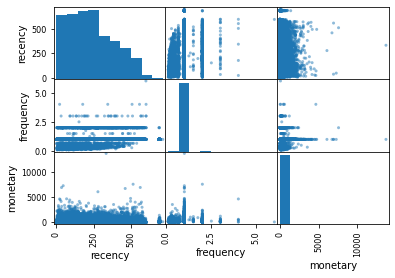

In [269]:
pd.plotting.scatter_matrix(rfm);

In [270]:
rfm.skew(numeric_only=True)

recency      0.447338
frequency    4.874460
monetary     9.212262
dtype: float64

In [271]:
rfm.describe()

recency     frequency      monetary
count  93336.000000  93336.000000  93336.000000
mean     237.903853      1.004460    165.169348
std      152.552964      0.140078    226.313356
min        1.000000      0.095238      9.590000
25%      114.000000      1.000000     63.010000
50%      219.000000      1.000000    107.780000
75%      346.000000      1.000000    182.495000
max      714.000000      6.000000  13664.080000

In [272]:
from scipy.stats import boxcox


def boxcox_df(x):
    xt, _ = boxcox(x)
    return xt


rfm_boxcox = rfm[["recency", "frequency", "monetary"]].apply(boxcox_df, axis=0)

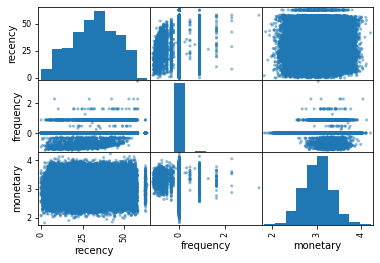

In [274]:
pd.plotting.scatter_matrix(rfm_boxcox);

In [275]:
rfm_boxcox.skew(numeric_only=True)

recency     -0.157674
frequency    1.578830
monetary     0.006353
dtype: float64

Sadly, and as we may expect the distribution of the frequency is really skewed.

We will probably have poor performance from KMeans


In [276]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(rfm_boxcox)

scaled_customers = scaler.transform(rfm_boxcox)

In [277]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_customers)

clusters = kmeans.labels_

rfm["cluster"] = clusters
rfm.cluster = rfm.cluster.astype("category")

rfm

customer_unique_id  recency  frequency  monetary cluster
0      0000366f3b9a7992bf8c76cfdf3221e2    112.0        1.0    141.90       1
1      0000b849f77a49e4a4ce2b2a4ca5be3f    115.0        1.0     27.19       1
2      0000f46a3911fa3c0805444483337064    537.0        1.0     86.22       0
3      0000f6ccb0745a6a4b88665a16c9f078    321.0        1.0     43.62       0
4      0004aac84e0df4da2b147fca70cf8255    288.0        1.0    196.89       0
...                                 ...      ...        ...       ...     ...
93331  fffcf5a5ff07b0908bd4e2dbc735a684    447.0        1.0   2067.42       0
93332  fffea47cd6d3cc0a88bd621562a9d061    262.0        1.0     84.58       0
93333  ffff371b4d645b6ecea244b27531430a    568.0        1.0    112.46       0
93334  ffff5962728ec6157033ef9805bacc48    119.0        1.0    133.69       1
93335  ffffd2657e2aad2907e67c3e9daecbeb    484.0        1.0     71.56       0

[93336 rows x 5 columns]

Now, let's display our clusters 🤞

In [278]:
fig = px.scatter_3d(rfm, x="recency", y="monetary", z="frequency", color="cluster")
fig.show()

In [273]:
print("Done")

Done
